In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk

In [2]:
df=pd.read_csv(r"C:\\Users\\Welcome\\Downloads\\twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df['im getting on borderlands and i will murder you all , ']=df['im getting on borderlands and i will murder you all ,'].str.replace("(^a-zA-Z#)"," ")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,","im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized between the windows partition of...


In [4]:
df['im getting on borderlands and i will murder you all ,']=df['im getting on borderlands and i will murder you all ,'].astype(str)
df['im getting on borderlands and i will murder you all ,']=df['im getting on borderlands and i will murder you all ,'].fillna('')

In [5]:
token_tweets=df['im getting on borderlands and i will murder you all ,'].apply(lambda x:x.split())
token_tweets.head()

0    [I, am, coming, to, the, borders, and, I, will...
1    [im, getting, on, borderlands, and, i, will, k...
2    [im, coming, on, borderlands, and, i, will, mu...
3    [im, getting, on, borderlands, 2, and, i, will...
4    [im, getting, into, borderlands, and, i, can, ...
Name: im getting on borderlands and i will murder you all ,, dtype: object

In [6]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


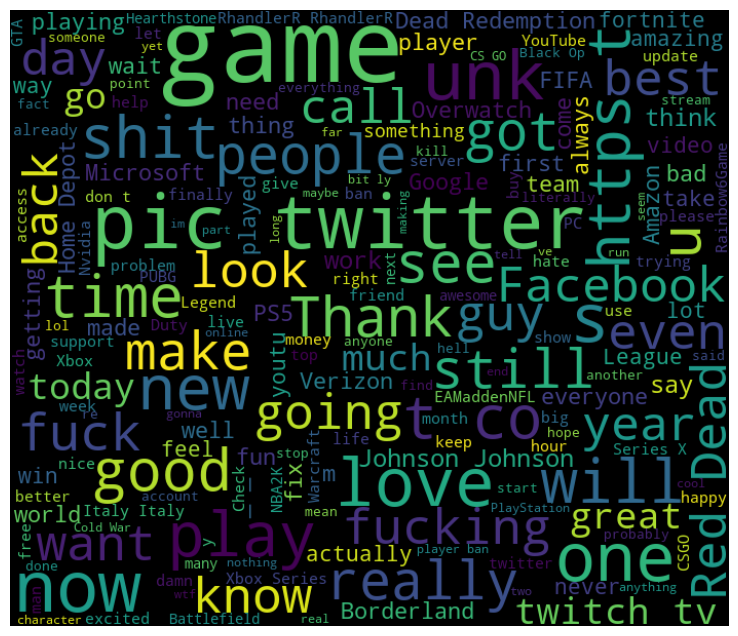

In [7]:
from wordcloud import WordCloud
words=" ".join([sentence for sentence in df['im getting on borderlands and i will murder you all ,']])
wordcloud=WordCloud(width=700,height=600,random_state=42,max_font_size=100).generate(words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   2401                                                    74681 non-null  int64 
 1   Borderlands                                             74681 non-null  object
 2   Positive                                                74681 non-null  object
 3   im getting on borderlands and i will murder you all ,   74681 non-null  object
 4   im getting on borderlands and i will murder you all ,   73995 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


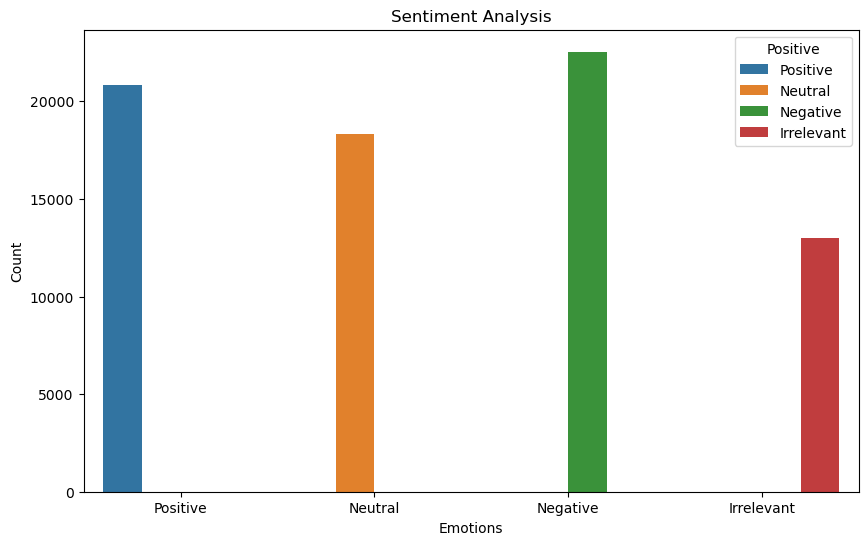

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Positive', data=df, hue='Positive')
plt.title('Sentiment Analysis')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.legend(title='Positive')
plt.show()


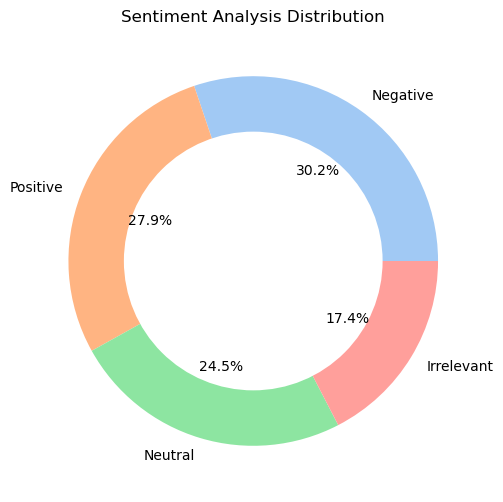

In [20]:
emotion = df['Positive'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(emotion, labels=emotion.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sentiment Analysis Distribution')
plt.show()
